# **Predictive Analysis and Coustmer Segmentation for an E-Commerce platform**
  by Devesh Kumar

In [30]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# step(1) Bussiness understanding and data collection

In [2]:
#data = pd.read_csv('data.csv', encoding='ISO-8859-1')

In [3]:
data=pd.read_excel("https://raw.githubusercontent.com/rafayk330/ecommerce_eda/main/cleaned_data.xlsx")

In [ ]:
data

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,3,8
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,3,8
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,3,8
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,3,8
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...
397919,581587,2011-12-09 12:50:00,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France,12,5,12
397920,581587,2011-12-09 12:50:00,22899,children's apron dolly girl,6,2.10,12.60,12680,France,12,5,12
397921,581587,2011-12-09 12:50:00,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France,12,5,12
397922,581587,2011-12-09 12:50:00,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France,12,5,12


In [ ]:
data.head()

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,DayCode
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,Wednesday,8,2
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,Wednesday,8,2
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2


In [ ]:
data.tail()

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,DayCode
397919,581587,2011-12-09 12:50:00,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France,12,Friday,12,4
397920,581587,2011-12-09 12:50:00,22899,children's apron dolly girl,6,2.10,12.60,12680,France,12,Friday,12,4
397921,581587,2011-12-09 12:50:00,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France,12,Friday,12,4
397922,581587,2011-12-09 12:50:00,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France,12,Friday,12,4
397923,581587,2011-12-09 12:50:00,22138,baking set 9 piece retrospot,3,4.95,14.85,12680,France,12,Friday,12,4


# step (2) Data Cleaning and Preprocessing

In [ ]:
data.info

<bound method DataFrame.info of         invoice_no        invoice_date stock_code  \
0           536365 2010-12-01 08:26:00     85123A   
1           536365 2010-12-01 08:26:00      71053   
2           536365 2010-12-01 08:26:00     84406B   
3           536365 2010-12-01 08:26:00     84029G   
4           536365 2010-12-01 08:26:00     84029E   
...            ...                 ...        ...   
397919      581587 2011-12-09 12:50:00      22613   
397920      581587 2011-12-09 12:50:00      22899   
397921      581587 2011-12-09 12:50:00      23254   
397922      581587 2011-12-09 12:50:00      23255   
397923      581587 2011-12-09 12:50:00      22138   

                                description  quantity  unit_price  \
0        white hanging heart t-light holder         6        2.55   
1                       white metal lantern         6        3.39   
2            cream cupid hearts coat hanger         8        2.75   
3       knitted union flag hot water bottle         6  

In [ ]:
data.isnull().sum()

invoice_no      0
invoice_date    0
stock_code      0
description     0
quantity        0
unit_price      0
amount_spent    0
customer_id     0
country         0
month           0
day             0
hour            0
DayCode         0
dtype: int64

In [ ]:
data.describe()

,invoice_no,quantity,unit_price,amount_spent,customer_id,month,hour,DayCode
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,13.021823,3.116174,22.394749,15294.315171,7.612537,12.728247,2.614555
std,13106.167695,180.420210,22.096788,309.055588,1713.169877,3.416527,2.273535,1.928274
min,536365.000000,1.000000,0.000000,0.000000,12346.000000,1.000000,6.000000,0.000000
25%,549234.000000,2.000000,1.250000,4.680000,13969.000000,5.000000,11.000000,1.000000
50%,561893.000000,6.000000,1.950000,11.800000,15159.000000,8.000000,13.000000,2.000000
75%,572090.000000,12.000000,3.750000,19.800000,16795.000000,11.000000,14.000000,4.000000
max,581587.000000,80995.000000,8142.750000,168469.600000,18287.000000,12.000000,20.000000,6.000000


In [ ]:
data.query('quantity<0')

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,DayCode


In [ ]:
data.query('unit_price<=0')

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,DayCode
6914,537197,2010-12-05 14:02:00,22841,round cake tin vintage green,1,0.0,0.0,12647,Germany,12,Sunday,14,6
22539,539263,2010-12-16 14:36:00,22580,advent calendar gingham sack,4,0.0,0.0,16560,United Kingdom,12,Thursday,14,3
25379,539722,2010-12-21 13:45:00,22423,regency cakestand 3 tier,10,0.0,0.0,14911,EIRE,12,Tuesday,13,1
29080,540372,2011-01-06 16:41:00,22090,paper bunting retrospot,24,0.0,0.0,13081,United Kingdom,1,Thursday,16,3
29082,540372,2011-01-06 16:41:00,22553,plasters in tin skulls,24,0.0,0.0,13081,United Kingdom,1,Thursday,16,3
34494,541109,2011-01-13 15:10:00,22168,organiser wood antique white,1,0.0,0.0,15107,United Kingdom,1,Thursday,15,3
53788,543599,2011-02-10 13:08:00,84535B,fairy cakes notebook a6 size,16,0.0,0.0,17560,United Kingdom,2,Thursday,13,3
85671,547417,2011-03-23 10:25:00,22062,ceramic bowl with love heart design,36,0.0,0.0,13239,United Kingdom,3,Wednesday,10,2
92875,548318,2011-03-30 12:45:00,22055,mini cake stand hanging strawbery,5,0.0,0.0,13113,United Kingdom,3,Wednesday,12,2
97430,548871,2011-04-04 14:42:00,22162,heart garland rustic padded,2,0.0,0.0,14410,United Kingdom,4,Monday,14,0


In [ ]:
neg_index = data[(data['quantity']<0) | (data['unit_price']<=0)].index
data = data.drop(neg_index)

In [ ]:
data.reset_index(drop=True)

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,DayCode
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,Wednesday,8,2
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,Wednesday,8,2
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,Wednesday,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
397879,581587,2011-12-09 12:50:00,22613,pack of 20 spaceboy napkins,12,0.85,10.20,12680,France,12,Friday,12,4
397880,581587,2011-12-09 12:50:00,22899,children's apron dolly girl,6,2.10,12.60,12680,France,12,Friday,12,4
397881,581587,2011-12-09 12:50:00,23254,childrens cutlery dolly girl,4,4.15,16.60,12680,France,12,Friday,12,4
397882,581587,2011-12-09 12:50:00,23255,childrens cutlery circus parade,4,4.15,16.60,12680,France,12,Friday,12,4


In [ ]:
data.describe()

,invoice_no,quantity,unit_price,amount_spent,customer_id,month,hour,DayCode
count,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000,397884.000000
mean,560616.934451,12.988238,3.116488,22.397000,15294.423453,7.612475,12.728202,2.614546
std,13106.117773,179.331775,22.097877,309.071041,1713.141560,3.416520,2.273519,1.928310
min,536365.000000,1.000000,0.001000,0.001000,12346.000000,1.000000,6.000000,0.000000
25%,549234.000000,2.000000,1.250000,4.680000,13969.000000,5.000000,11.000000,1.000000
50%,561893.000000,6.000000,1.950000,11.800000,15159.000000,8.000000,13.000000,2.000000
75%,572090.000000,12.000000,3.750000,19.800000,16795.000000,11.000000,14.000000,4.000000
max,581587.000000,80995.000000,8142.750000,168469.600000,18287.000000,12.000000,20.000000,6.000000


In [8]:
#Calulating total bill amount
data['Total_Amount'] = data['unit_price'] * data['quantity']
data.head()

,invoice_no,invoice_date,stock_code,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,Total_Amount
0,536365,2010-12-01 08:26:00,85123A,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,3,8,15.30
1,536365,2010-12-01 08:26:00,71053,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34
2,536365,2010-12-01 08:26:00,84406B,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,3,8,22.00
3,536365,2010-12-01 08:26:00,84029G,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34
4,536365,2010-12-01 08:26:00,84029E,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34


In [9]:
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format ='%m/%d/%Y %H:%M')
data.insert(loc=3, column="Year", value = data.invoice_date.dt.year)

In [10]:
data.head()

,invoice_no,invoice_date,stock_code,Year,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,Total_Amount
0,536365,2010-12-01 08:26:00,85123A,2010,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,3,8,15.30
1,536365,2010-12-01 08:26:00,71053,2010,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34
2,536365,2010-12-01 08:26:00,84406B,2010,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,3,8,22.00
3,536365,2010-12-01 08:26:00,84029G,2010,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34
4,536365,2010-12-01 08:26:00,84029E,2010,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,3,8,20.34


**step 3 Exploratory data analysis**

In [11]:

#top 10 countries with highest sales
top_10_country_sales = data.groupby('country')['Total_Amount'].sum().sort_values(ascending = False).head(10).reset_index()
top_10_country_sales

,country,Total_Amount
0,United Kingdom,7308391.554
1,Netherlands,285446.340
2,EIRE,265545.900
3,Germany,228867.140
4,France,209024.050
5,Australia,138521.310
6,Spain,61577.110
7,Switzerland,56443.950
8,Belgium,41196.340
9,Sweden,38378.330


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'United Kingdom'),
  Text(1, 0, 'Netherlands'),
  Text(2, 0, 'EIRE'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Australia'),
  Text(6, 0, 'Spain'),
  Text(7, 0, 'Switzerland'),
  Text(8, 0, 'Belgium'),
  Text(9, 0, 'Sweden')])

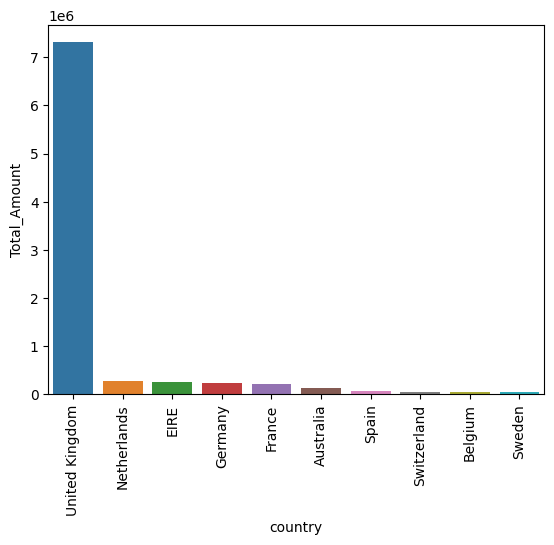

In [ ]:
sns.barplot(data = top_10_country_sales, x='country', y='Total_Amount')
plt.xticks(rotation='vertical')

In [ ]:
data['DayCode'] = data['invoice_date'].dt.dayofweek
data['day'] = data['invoice_date'].dt.day_name()

In [ ]:
# most favorable day of shopping
data_by_day = data.groupby(["day", "DayCode"]).agg({"Total_Amount": "sum", "invoice_no":"count"}) \
            .reset_index() \
            .sort_values(by="DayCode") \
            .rename(columns = {"Total_Amount":"ValueTransaction", "invoice_no":"NumberOfOrders"})
data_by_day

,day,DayCode,ValueTransaction,NumberOfOrders
1,Monday,0,1367146.411,64893
4,Tuesday,1,1700634.631,66473
5,Wednesday,2,1588336.170,68885
3,Thursday,3,1976859.070,80035
0,Friday,4,1485917.401,54825
2,Sunday,6,792514.221,62773


<Axes: xlabel='day', ylabel='ValueTransaction'>

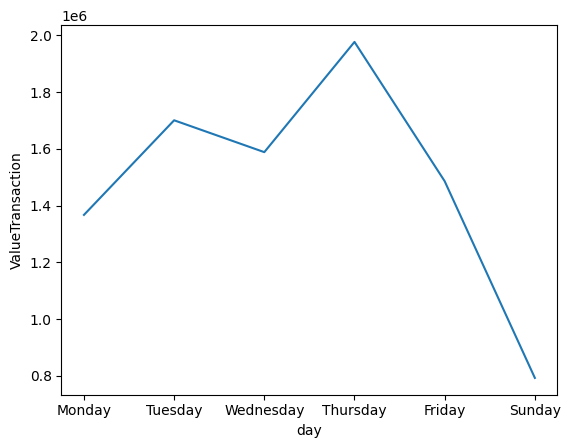

In [ ]:
sns.lineplot(data = data_by_day, x='day', y='ValueTransaction')

<ipython-input-4-be3cf8182539>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr(),annot=True)


<Axes: >

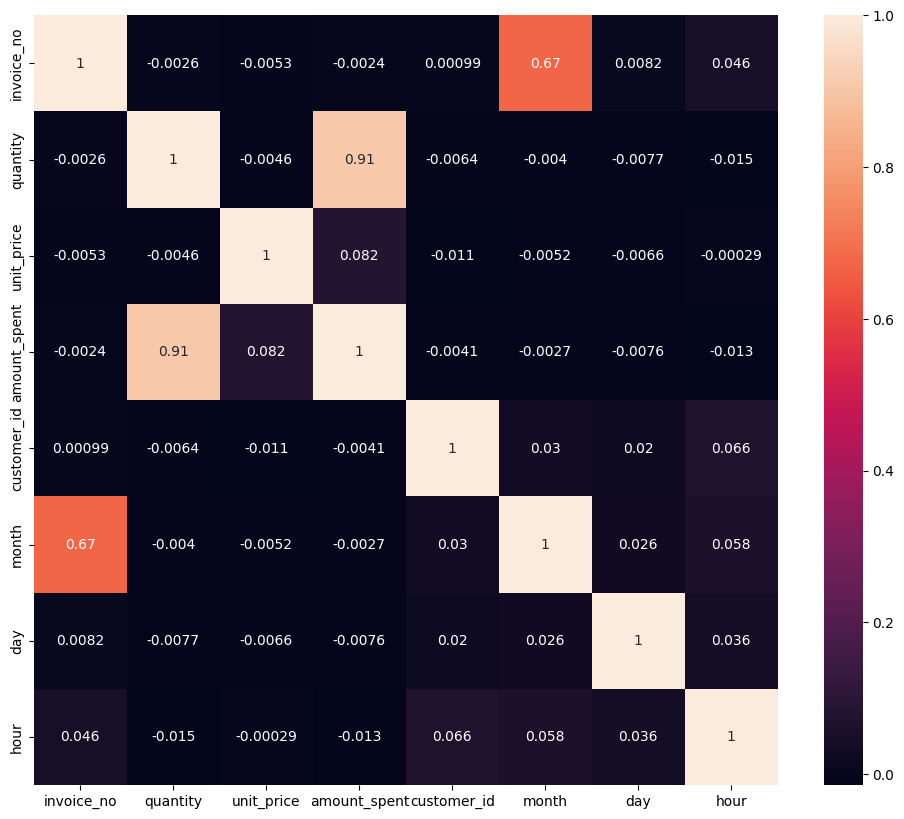

In [4]:
plt.figure(figsize=(12,10))
sns.heatmap(data.corr(),annot=True)

In [12]:
purchase=data.groupby(by=['customer_id','country'],as_index=False)['Total_Amount'].sum()
purchase

,customer_id,country,Total_Amount
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4342,18280,United Kingdom,180.60
4343,18281,United Kingdom,80.82
4344,18282,United Kingdom,178.05
4345,18283,United Kingdom,2094.88


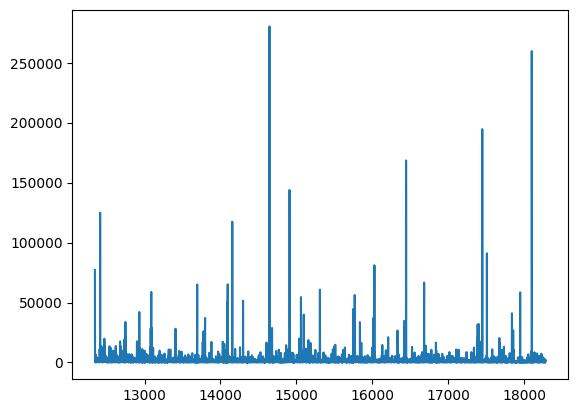

In [13]:
plt.plot(purchase['customer_id'],purchase['Total_Amount'])
plt.xlabel=('customer_id')
plt.ylabel=('Total_Amount')

In [20]:
cc=data.groupby(by=['customer_id','country'],as_index=False)['invoice_no'].count()
cc.head()

,customer_id,country,invoice_no
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17


TypeError: ignored

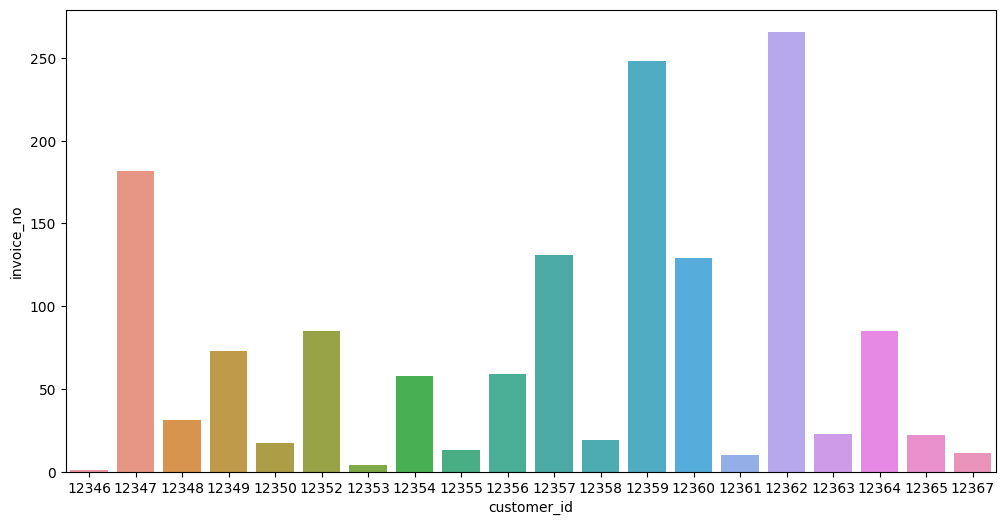

In [37]:
customer_data = cc['customer_id'].head(20)
invoice_data = cc['invoice_no'].head(20)

# To Create the barplot
plt.figure(figsize=(12, 6))
sns.barplot(x=customer_data, y=invoice_data)
plt.xlabel('CustomerId')
plt.ylabel('No. of customers per country')
plt.show()




TypeError: ignored

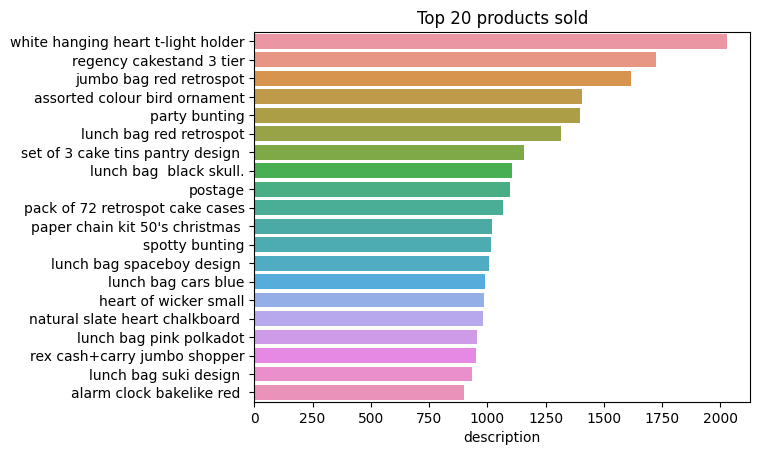

In [40]:
sns.barplot(x = data.description.value_counts().head(20), y = data.description.value_counts().head(20).index)
plt.title("Top 20 products sold")
plt.xlabel("quantity")

# step (4) Feature engineering and data Transformation

In [42]:
data['month']=data['invoice_date'].dt.month
data['day']=data['invoice_date'].dt.day
data['hour']=data['invoice_date'].dt.hour

In [43]:
data.head()

,invoice_no,invoice_date,stock_code,Year,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,Total_Amount
0,536365,2010-12-01 08:26:00,85123A,2010,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,1,8,15.30
1,536365,2010-12-01 08:26:00,71053,2010,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34
2,536365,2010-12-01 08:26:00,84406B,2010,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,1,8,22.00
3,536365,2010-12-01 08:26:00,84029G,2010,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34
4,536365,2010-12-01 08:26:00,84029E,2010,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34


In [45]:
data.describe()

,invoice_no,Year,quantity,unit_price,amount_spent,customer_id,month,day,hour,Total_Amount
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,13.021823,3.116174,22.394749,15294.315171,7.612537,15.042181,12.728247,22.394749
std,13106.167695,0.247829,180.420210,22.096788,309.055588,1713.169877,3.416527,8.653771,2.273535,309.055588
min,536365.000000,2010.000000,1.000000,0.000000,0.000000,12346.000000,1.000000,1.000000,6.000000,0.000000
25%,549234.000000,2011.000000,2.000000,1.250000,4.680000,13969.000000,5.000000,7.000000,11.000000,4.680000
50%,561893.000000,2011.000000,6.000000,1.950000,11.800000,15159.000000,8.000000,15.000000,13.000000,11.800000
75%,572090.000000,2011.000000,12.000000,3.750000,19.800000,16795.000000,11.000000,22.000000,14.000000,19.800000
max,581587.000000,2011.000000,80995.000000,8142.750000,168469.600000,18287.000000,12.000000,31.000000,20.000000,168469.600000


In [46]:
data['Log_Annual_Spending']=np.log1p(data['Total_Amount'])

In [47]:
data.describe()

,invoice_no,Year,quantity,unit_price,amount_spent,customer_id,month,day,hour,Total_Amount,Log_Annual_Spending
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,560617.126645,2010.934259,13.021823,3.116174,22.394749,15294.315171,7.612537,15.042181,12.728247,22.394749,2.454360
std,13106.167695,0.247829,180.420210,22.096788,309.055588,1713.169877,3.416527,8.653771,2.273535,309.055588,1.020615
min,536365.000000,2010.000000,1.000000,0.000000,0.000000,12346.000000,1.000000,1.000000,6.000000,0.000000,0.000000
25%,549234.000000,2011.000000,2.000000,1.250000,4.680000,13969.000000,5.000000,7.000000,11.000000,4.680000,1.736951
50%,561893.000000,2011.000000,6.000000,1.950000,11.800000,15159.000000,8.000000,15.000000,13.000000,11.800000,2.549445
75%,572090.000000,2011.000000,12.000000,3.750000,19.800000,16795.000000,11.000000,22.000000,14.000000,19.800000,3.034953
max,581587.000000,2011.000000,80995.000000,8142.750000,168469.600000,18287.000000,12.000000,31.000000,20.000000,168469.600000,12.034517


(array([4.86080e+04, 1.30598e+05, 1.80728e+05, 2.90540e+04, 7.70800e+03,
        1.03100e+03, 1.87000e+02, 7.00000e+00, 1.00000e+00, 2.00000e+00]),
 array([ 0.        ,  1.20345165,  2.40690331,  3.61035496,  4.81380661,
         6.01725827,  7.22070992,  8.42416157,  9.62761323, 10.83106488,
        12.03451653]),
 <BarContainer object of 10 artists>)

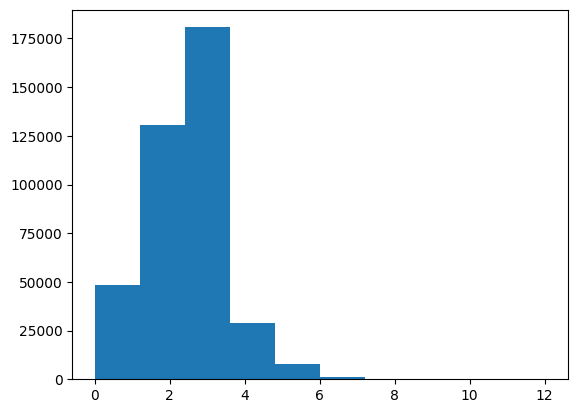

In [48]:
plt.hist(data['Log_Annual_Spending'])

In [49]:
a_spending = data.groupby('customer_id')['Total_Amount'].sum()
a_spending

customer_id
12346    77183.60
12347     4310.00
12348     1797.24
12349     1757.55
12350      334.40
           ...   
18280      180.60
18281       80.82
18282      178.05
18283     2094.88
18287     1837.28
Name: Total_Amount, Length: 4339, dtype: float64

(array([3.97921e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([     0.  ,  16846.96,  33693.92,  50540.88,  67387.84,  84234.8 ,
        101081.76, 117928.72, 134775.68, 151622.64, 168469.6 ]),
 <BarContainer object of 10 artists>)

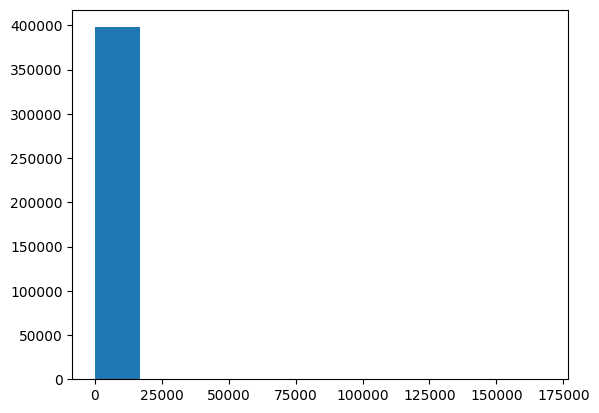

In [50]:
plt.hist(data['Total_Amount'])

In [51]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
data['Country_Encoded']=LE.fit_transform(data['country'])

In [52]:
data.head()

,invoice_no,invoice_date,stock_code,Year,description,quantity,unit_price,amount_spent,customer_id,country,month,day,hour,Total_Amount,Log_Annual_Spending,Country_Encoded
0,536365,2010-12-01 08:26:00,85123A,2010,white hanging heart t-light holder,6,2.55,15.30,17850,United Kingdom,12,1,8,15.30,2.791165,35
1,536365,2010-12-01 08:26:00,71053,2010,white metal lantern,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34,3.060583,35
2,536365,2010-12-01 08:26:00,84406B,2010,cream cupid hearts coat hanger,8,2.75,22.00,17850,United Kingdom,12,1,8,22.00,3.135494,35
3,536365,2010-12-01 08:26:00,84029G,2010,knitted union flag hot water bottle,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34,3.060583,35
4,536365,2010-12-01 08:26:00,84029E,2010,red woolly hottie white heart.,6,3.39,20.34,17850,United Kingdom,12,1,8,20.34,3.060583,35


# step (5) Predictive model building

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics


In [58]:
x = data[['quantity', 'unit_price', 'Country_Encoded', 'Year']]
y = data['Total_Amount']

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [66]:
# Assuming x_test, y_test, x_train, and y_train are defined as arrays or dataframes

# Print x_test
print("x_test:")
print(x_test)

# Print y_test
print("\ny_test:")
print(y_test)

# Print x_train
print("\nx_train:")
print(x_train)

# Print y_train
print("\ny_train:")
print(y_train)


x_test:
        quantity  unit_price  Country_Encoded  Year
374214        12        0.79               35  2011
312572         1        1.25               35  2011
68616          1        1.95               35  2011
313933        10        0.85               35  2011
67035         24        0.29               35  2011
...          ...         ...              ...   ...
45033          1        4.25               35  2011
195134        12        1.95               35  2011
243021        24        0.42               35  2011
121491        10        0.85               35  2011
61670          6        1.25               35  2011

[79585 rows x 4 columns]

y_test:
374214     9.48
312572     1.25
68616      1.95
313933     8.50
67035      6.96
          ...  
45033      4.25
195134    23.40
243021    10.08
121491     8.50
61670      7.50
Name: Total_Amount, Length: 79585, dtype: float64

x_train:
        quantity  unit_price  Country_Encoded  Year
113595        12        0.85               14

In [67]:
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [68]:
y_train_predict_lr = lr.predict(x_train)
y_test_predict_lr = lr.predict(x_test)

In [69]:
dtr = DecisionTreeRegressor(random_state = 42)
dtr.fit(x_train,y_train)

DecisionTreeRegressor(random_state=42)

In [70]:
y_train_predict_dtr = dtr.predict(x_train)
y_test_predict_dtr = dtr.predict(x_test)

In [72]:
rfr = RandomForestRegressor(random_state=42)
rfr.fit(x_train,y_train)

RandomForestRegressor(random_state=42)

In [73]:
y_train_predict_rfr = rfr.predict(x_train)
y_test_predict_rfr = rfr.predict(x_test)

# step (6) Model Evaluation and customer segmentation

In [77]:
print("Linear Regression Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_lr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_lr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_lr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_lr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_lr))
print("------By--> Devesh Verma--------")

Linear Regression Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 12.403588160084702
Mean Squared Error         : 19057.256869532444
Root Mean Squared Error    : 138.04802377988773
R2 Score                   : 0.8388062597477601

-----------------Testing Performance:-----------------
Mean Absolute Error        : 11.897239668259367
Mean Squared Error         : 3393.9202906278156
Root Mean Squared Error    : 58.25736254438417
R2 Score                   : 0.2734337735228861
------By--> Devesh Verma--------


In [78]:
print("Decision Tree Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_dtr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_dtr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_dtr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_dtr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_dtr))

Decision Tree Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 2.4049054555669375e-13
Mean Squared Error         : 2.8234759743300428e-25
Root Mean Squared Error    : 5.313639030203353e-13
R2 Score                   : 1.0

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.22034956336017059
Mean Squared Error         : 238.69716515675057
Root Mean Squared Error    : 15.449827350386494
R2 Score                   : 0.9489000083361877


In [79]:
print("Random Forest Regressor Model Performance: \n")

print("------------------Training Performance:----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_train,y_train_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_train,y_train_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_train,y_train_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_train,y_train_predict_rfr))

print("\n-----------------Testing Performance:-----------------")
print("Mean Absolute Error        :",metrics.mean_absolute_error(y_test,y_test_predict_rfr))
print("Mean Squared Error         :",metrics.mean_squared_error(y_test,y_test_predict_rfr))
print("Root Mean Squared Error    :",np.sqrt(metrics.mean_squared_error(y_test,y_test_predict_rfr)))
print("R2 Score                   :",metrics.r2_score(y_test,y_test_predict_rfr))

Random Forest Regressor Model Performance: 

------------------Training Performance:----------------
Mean Absolute Error        : 0.2923829032887392
Mean Squared Error         : 5043.440490970856
Root Mean Squared Error    : 71.01718447651143
R2 Score                   : 0.9573406056262529

-----------------Testing Performance:-----------------
Mean Absolute Error        : 0.15320557454304798
Mean Squared Error         : 58.57260845722357
Root Mean Squared Error    : 7.653274361815574
R2 Score                   : 0.9874608489718496


In [80]:
print("Accuracy on Training set:")
output_train = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_train,y_train_predict_lr)*100,metrics.r2_score(y_train,y_train_predict_dtr)*100, metrics.r2_score(y_train,y_train_predict_rfr)*100]})
output_train

Accuracy on Training set:


,Model,Accuracy
0,Linear Regressor,83.880626
1,Decision Tree Regressor,100.000000
2,Random Forest Regressor,95.734061


In [81]:
print("Accuracy on Testing set:")
output_test = pd.DataFrame({'Model':['Linear Regressor','Decision Tree Regressor','Random Forest Regressor'], 'Accuracy':[metrics.r2_score(y_test,y_test_predict_lr)*100, metrics.r2_score(y_test,y_test_predict_dtr)*100, metrics.r2_score(y_test,y_test_predict_rfr)*100]})
output_test

Accuracy on Testing set:


,Model,Accuracy
0,Linear Regressor,27.343377
1,Decision Tree Regressor,94.890001
2,Random Forest Regressor,98.746085


# Customer segmentation

In [82]:
import seaborn as sns
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [83]:
new_column_name={'TotalSpending_AnnualSpending':'Annual_Spending'}
data.rename(columns=new_column_name,inplace=True)

In [85]:
most_recent_date=data['invoice_date'].max()

rfm_data=data.groupby('customer_id').agg({
    'invoice_date':lambda x:(most_recent_date  - x.max()).days,
    'invoice_no': 'nunique',
    'Total_Amount': 'sum'
})
rfm_data.rename(columns={
    'invoice_date': 'Recency',
    'invoice_no': 'Frequency',
    'Total_Amount' :'MonetaryValue'
},   inplace=True)

In [86]:
rfm_data.head()

,Recency,Frequency,MonetaryValue
customer_id,,,
12346,325,1,77183.60
12347,1,7,4310.00
12348,74,4,1797.24
12349,18,1,1757.55
12350,309,1,334.40


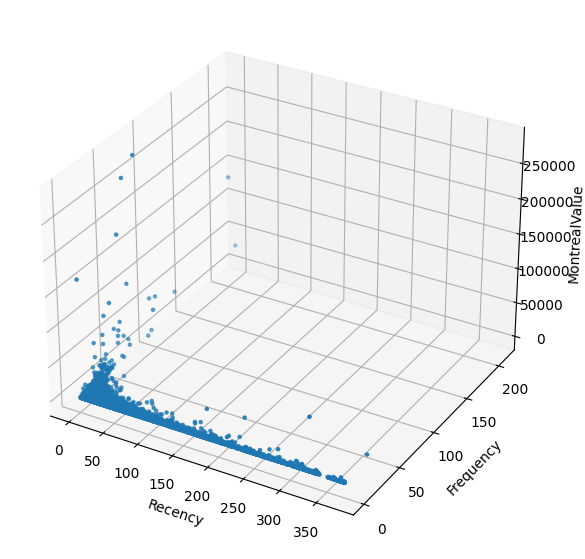

In [87]:
fig=plt.figure(figsize=(10,7))
ax=fig.add_subplot(111,projection='3d')
xs=rfm_data.Recency
ys=rfm_data.Frequency
zs=rfm_data.MonetaryValue
ax.scatter(xs,ys,zs,s=5)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('MontrealValue')
plt.show()


In [88]:
# Standardize the RFM metrics
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data)

In [89]:
# Apply K-Means clustering to create clusters based on RFM metrics

kmeans = KMeans(n_clusters=4, random_state= 42)
rfm_data['KMeans_Cluster'] = kmeans.fit_predict(rfm_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [90]:
print("K-Means Clustering:")
print(rfm_data['KMeans_Cluster'].value_counts())

K-Means Clustering:
0    3055
2    1067
3     204
1      13
Name: KMeans_Cluster, dtype: int64


In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm_data, x='Frequency', y='MonetaryValue', hue='KMeans_Cluster', palette='Set1', s=50)
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 2], c='red', marker='X', s=200, label='Cluster Centers')
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('RFM Customer Segmentation using K-Means Clustering (K=4)')
plt.legend()
plt.grid(True)
plt.show()

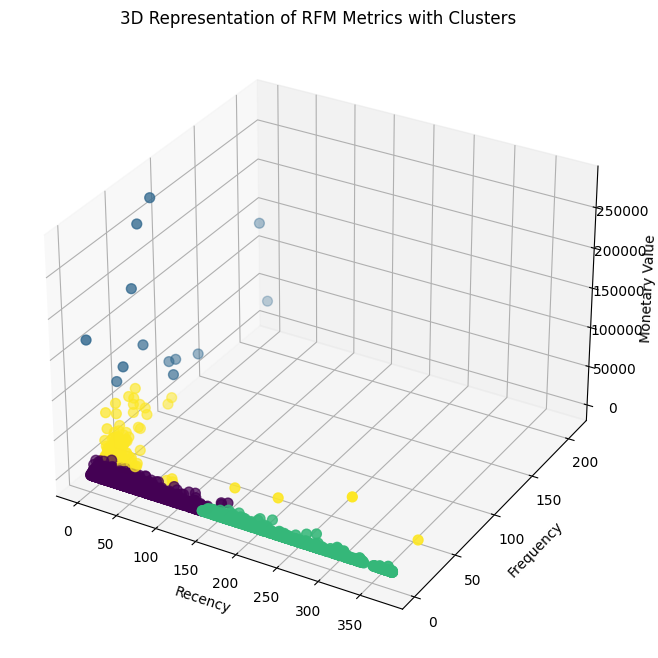

In [92]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['KMeans_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters')
plt.show()

In [93]:
# Apply Agglomerative Hierarchical Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)
rfm_data['Agg_Cluster'] = agg_clustering.fit_predict(rfm_scaled)

In [94]:
print("\nAgglomerative Hierarchical Clustering:")
print(rfm_data['Agg_Cluster'].value_counts())


Agglomerative Hierarchical Clustering:
1    3200
2     949
3     175
0      15
Name: Agg_Cluster, dtype: int64


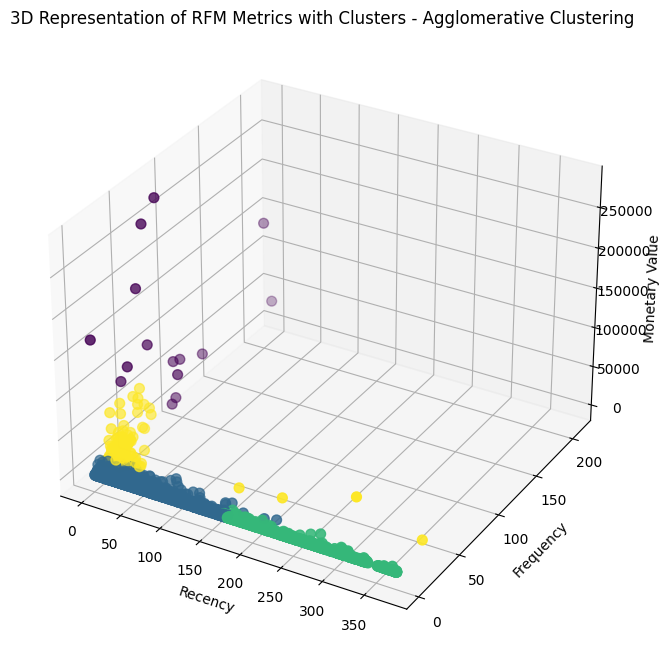

In [95]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm_data['Recency'], rfm_data['Frequency'], rfm_data['MonetaryValue'], c=rfm_data['Agg_Cluster'], cmap='viridis', s=50)
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary Value')
ax.set_title('3D Representation of RFM Metrics with Clusters - Agglomerative Clustering')
plt.show()

# step (7) Interpretation of results and Comunication

**High-Recency, Low-Frequency, Low-Monetary**
Customers in this segment do not frequently make purchases, as seen by their high Recency value.

They also have low Frequency, which means that they don't buy things too often.

Additionally, their MonetaryValue is low, indicating that they consume less than other categories.

These individuals can be potential churned or inactive consumers in need of re-engagement tactics.

**High-Recency, High-Frequency, High-Monetary**
This segment's customers have high Recency, which indicates that their purchases were not recent. But , they have high Frequency, which indicates that they shop frequently.

Furthermore, their MonetaryValue is high, showing that they spend a lot more than other groups do.

This group is an accurate representation of the best clients, who are also the most lucrative for the company. Through individualised offers and loyalty programmes, they should be rewarded and kept around.

**Low-Recency, High-Frequency, High-Monetary**
This segment's customers have low Recency, which means they have recently made purchases.

They often make purchases as evidenced by their high frequency.

Additionally, their MonetaryValue is high, indicating they have large expenditures.

This group is made up of devoted clients who are active buyers and a major source of income for the company. They will -probably respond favourably to loyalty incentives and tailored recommendations.

**Low-Recency, Low-Frequency, Low-Monetary**
This segment's customers have low Recency, which means they have recently made purchases.

They do, however, have low Frequency and low Monetary Value, indicating that they spend little money and make few purchases.

This group may be made up of clients who have recently made purchases but have not shown a high level of involvement or loyalty.

For them to spend more money and make purchases more frequently, they might need specific incentives or offers.

In [96]:
import joblib
joblib.dump(dtr,"ecom_model.pkl")

['ecom_model.pkl']

In [98]:
model=joblib.load('ecom_model.pkl')